In [16]:
import requests
import json
import re
from operator import itemgetter
import seaborn as sns

In [17]:
#here we get json response from the website by name of article
url = "https://en.wikipedia.org/w/api.php"
def get_content(name):
    res = requests.get(url, params={"action":"query", "prop": "extracts","titles":name, "format":"json"})
    return res.json()

data = get_content("Ozone_layer")

In [18]:
#here we take only html part of json response and clean it from html markup
def merge_contents(data):
    my_dict = list(data['query']['pages'].keys())
    page_id = my_dict[0]
    text = data['query']['pages'][page_id]['extract']
    html_pattern = re.compile('<.*?>')
    clean_text = re.sub(html_pattern, '', text)
    return clean_text

my_text = merge_contents(data)

In [19]:
#here we take the text after cleaning and create a list of words from the text
def tokenize(content):
    res = re.split("\. |, |\.|\n| |-|\'|\)|\(|\:|\;|\"", content)
    arr = [x for x in res if x]
    return arr

arr = tokenize(my_text)

In [20]:
#here we lower all words in our list
def lower_collection(collection):
    for i in range(len(collection)):
        collection[i] = collection[i].lower()
    return collection

arr_l = lower_collection(arr)

In [29]:
#here we remove useless words from our list
stop_words = ["the", "a", "of", "to","is","was","as","for","are","in","at","it","about","be","by", "from", "on", "or", "that", "and", "s"]
def remove_stop_words(words, stop_words):
    for word in words:
        if word in stop_words:
            words.remove(word)
    return words

filtered_collection = remove_stop_words(arr_l, stop_words)
#filtered_collection

In [25]:
#here we count frequencies of each word and sort them in desceding order
def count_frequency(collection):
    freq_dict = {}
    for item in collection:
        if(item in freq_dict):
            freq_dict[item] = freq_dict[item] + 1
        else:
            freq_dict[item] = 1
    sorted_freqs = {key:value for key,value in sorted(freq_dict.items(), key = itemgetter(1), reverse = True)}
    return sorted_freqs

freqs = count_frequency(filtered_collection)
#freqs

In [26]:
#here we just print top n words
def print_most_frequent(frequencies, n):
    arr = list(frequencies.items())
    for i in range(n):
        print(arr[i][0], arr[i][1])
        
print_most_frequent(freqs, 10)

ozone 82
layer 28
uv 17
radiation 16
ultraviolet 13
stratosphere 12
atmosphere 12
earth 11
o 11
surface 10


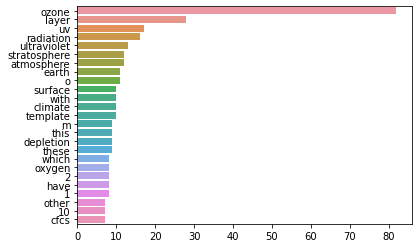

In [27]:
#here we plot the top 25 words 
def plot_top_n(freqs, n):
    x_arr = [v for k,v in freqs.items()]
    y_arr = [k for k,v in freqs.items()]
    sns.barplot(x=x_arr[0:n], y=y_arr[0:n])
    
plot_top_n(freqs, 25)